In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import re
import string

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
data = pd.read_csv('/content/data (3).csv')

In [5]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [6]:
data['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
neutral,0.535775
positive,0.317015
negative,0.147210


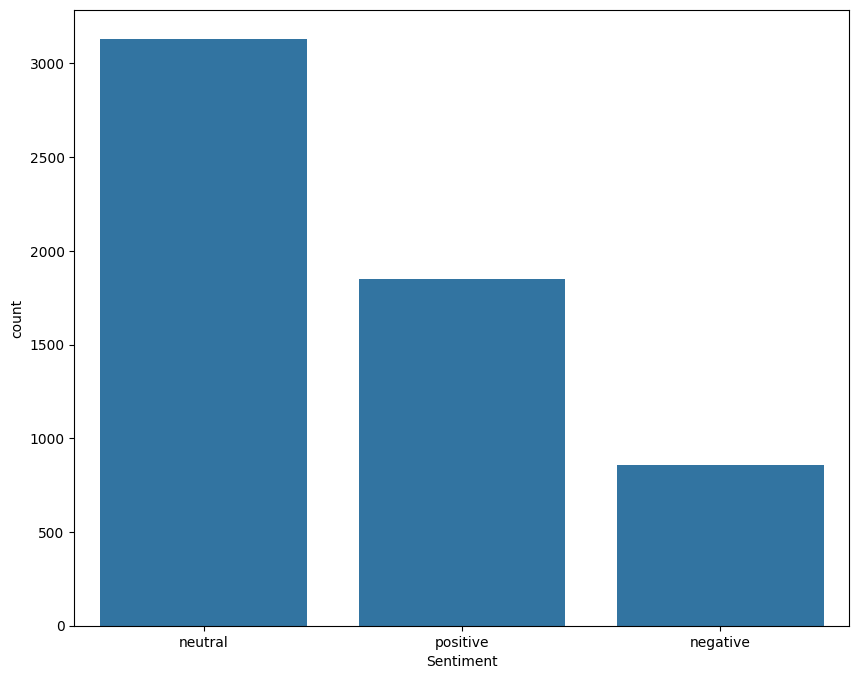

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(data =data['Sentiment'].value_counts())
plt.show()

In [12]:
stm = PorterStemmer().stem
lemmt = WordNetLemmatizer().lemmatize

In [13]:
def cleaned_Sentences(sentence):
  sentence = sentence.lower()
  sentence = re.sub('[^a-zA-Z]+', ' ', sentence).split()
  sentence = [stm(word) for word in sentence if word not in stopwords.words('english')]
  sentence = ' '.join(sentence)
  return sentence

In [14]:
def cleaned_Sentences1(sentence):
  sentence = sentence.lower()
  sentence = re.sub('[^a-zA-Z]+', ' ', sentence).split()
  sentence = [lemmt(word) for word in sentence if word not in stopwords.words('english')]
  sentence = ' '.join(sentence)
  return sentence

In [10]:
data['Stemmed_sentence'] = data['Sentence'].apply(lambda x: cleaned_Sentences(x))

In [15]:
data['lemmatize_sentence'] = data['Sentence'].apply(lambda x: cleaned_Sentences1(x))

In [16]:
data.head()

,Sentence,Sentiment,Stemmed_sentence,lemmatize_sentence
0,The GeoSolutions technology will leverage Bene...,positive,geosolut technolog leverag benefon gp solut pr...,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low bk real possibl,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sale doubl eur eur...,last quarter componenta net sale doubled eur e...
3,According to the Finnish-Russian Chamber of Co...,neutral,accord finnish russian chamber commerc major c...,according finnish russian chamber commerce maj...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remain percent stake ...,swedish buyout firm sold remaining percent sta...


In [18]:
#DATA VISUALIZATION
## CHECKING WHOCH SENTIMENT HAS WHICH WORDS REPEATED IN IT
data['Sentiment'].value_counts()

,count
Sentiment,
neutral,3130
positive,1852
negative,860


In [26]:
post_sentiment_df =   data[data['Sentiment']== 'positive']
post_sentiment_df.head()

,Sentence,Sentiment,Stemmed_sentence,lemmatize_sentence
0,The GeoSolutions technology will leverage Bene...,positive,geosolut technolog leverag benefon gp solut pr...,geosolutions technology leverage benefon gps s...
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sale doubl eur eur...,last quarter componenta net sale doubled eur e...
5,$SPY wouldn't be surprised to see a green close,positive,spi surpris see green close,spy surprised see green close
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,kone net sale rose year year first nine month,kone net sale rose year year first nine month
10,Circulation revenue has increased by 5 % in Fi...,positive,circul revenu increas finland sweden,circulation revenue increased finland sweden


In [34]:
cv = CountVectorizer()
words = cv.fit_transform(data['lemmatize_sentence'])
sum_words = words.sum(axis=0)
sum_words
words_count = [(words,sum_words[0,i]) for words, i in cv.vocabulary_.items()]
words_count = sorted(words_count, key = lambda x: x[1],reverse = True)
posotive_count_df = pd.DataFrame(words_count , columns = ['word', 'count'])
posotive_count_df.head(10)

,word,count
0,eur,1734
1,company,917
2,mn,821
3,sale,609
4,profit,585
5,finnish,539
6,year,528
7,share,521
8,said,516
9,net,500


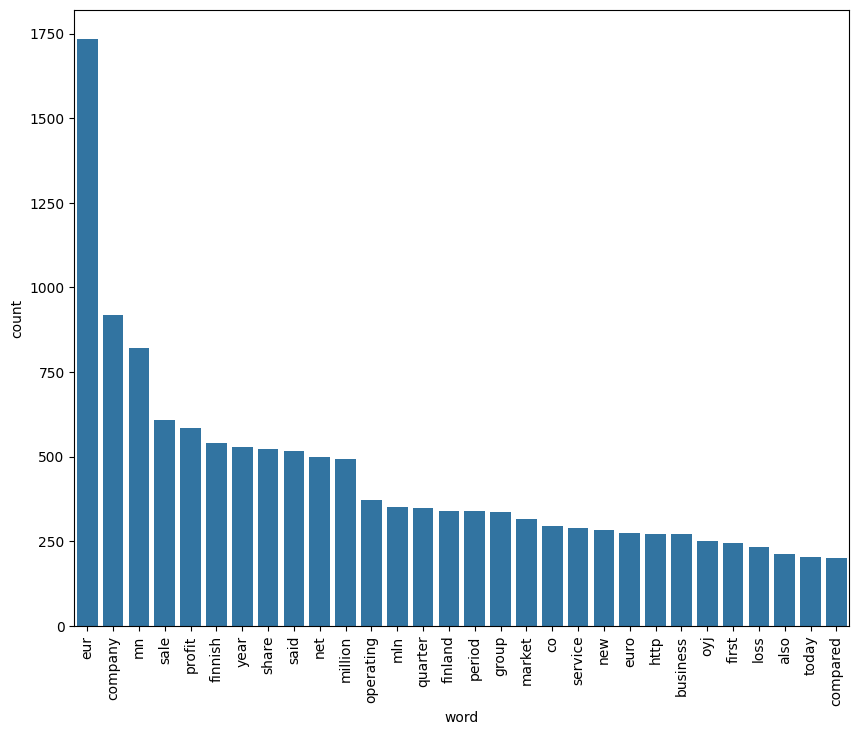

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(data =posotive_count_df.head(30), x='word', y='count')
plt.xticks(rotation=90)
plt.show()

In [45]:
## neutral
nuetral_sent_df = data[data['Sentiment']=='neutral']
nuetral_sent_df.head()


,Sentence,Sentiment,Stemmed_sentence,lemmatize_sentence
3,According to the Finnish-Russian Chamber of Co...,neutral,accord finnish russian chamber commerc major c...,according finnish russian chamber commerce maj...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remain percent stake ...,swedish buyout firm sold remaining percent sta...
9,The Stockmann department store will have a tot...,neutral,stockmann depart store total floor space squar...,stockmann department store total floor space s...
13,Viking Line has canceled some services .,neutral,vike line cancel servic,viking line canceled service
14,Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEME...,neutral,ahlstrom corpor stock exchang announc total ne...,ahlstrom corporation stock exchange announceme...


In [49]:
words = cv.fit_transform(nuetral_sent_df['lemmatize_sentence'])
sum_words = words.sum(axis=0)
words_count = [(words,sum_words[0,i])for words,i in cv.vocabulary_.items()]
words_count = sorted(words_count,key = lambda x:x[1], reverse= True)
nuteral_words_Df = pd.DataFrame(words_count ,columns = ['words','count'])
nuteral_words_Df.head(20)

,words,count
0,eur,722
1,company,596
2,share,332
3,mn,329
4,sale,271
5,finnish,267
6,said,258
7,million,251
8,finland,236
9,profit,216


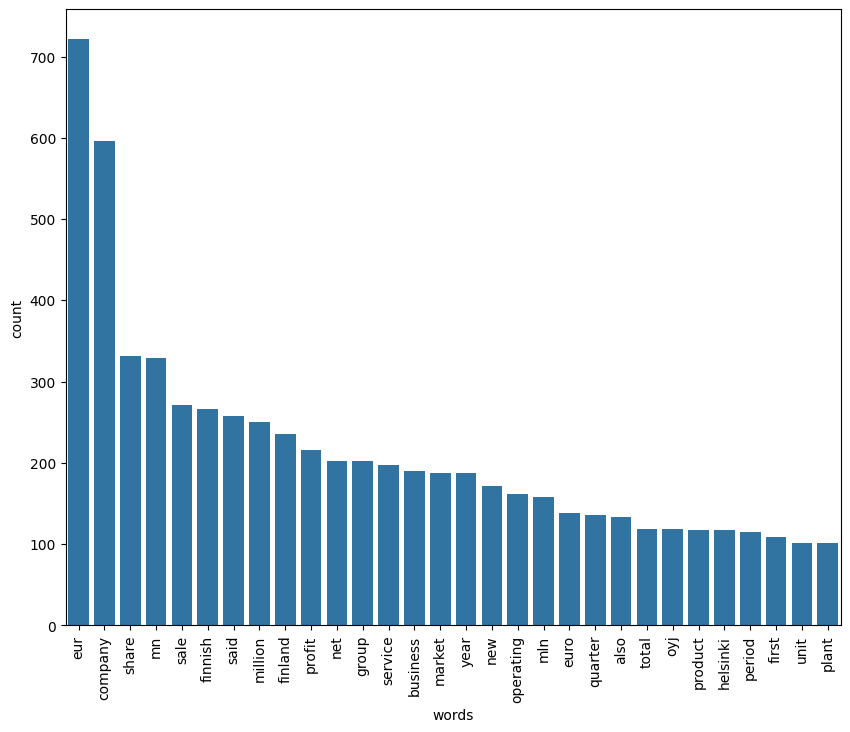

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(data =nuteral_words_Df.head(30) , x ='words',  y='count')
plt.xticks(rotation =90)
plt.show()

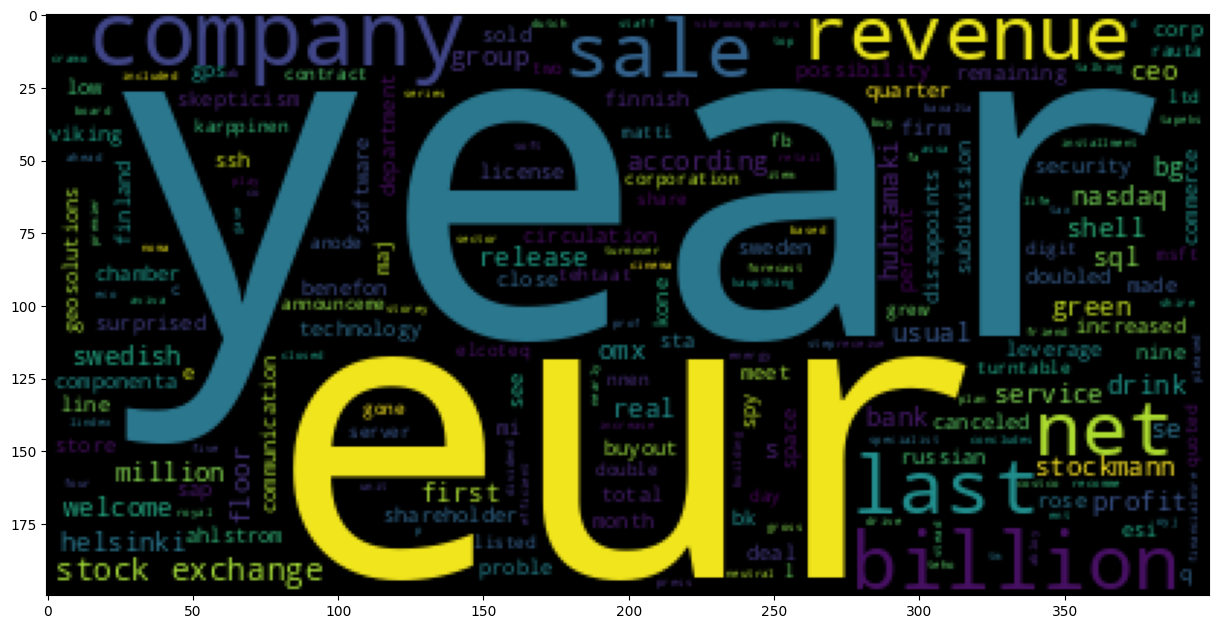

In [52]:
### DATA VISUALIZATION USING WORDCLOUD
#this word map is for all the frequent words  including negative , positive , nuetral
from wordcloud import WordCloud
plt.figure(figsize=(15,8))
wc = WordCloud().generate(str(data['lemmatize_sentence'].iloc[:40:]))
plt.imshow(wc)
plt.show()

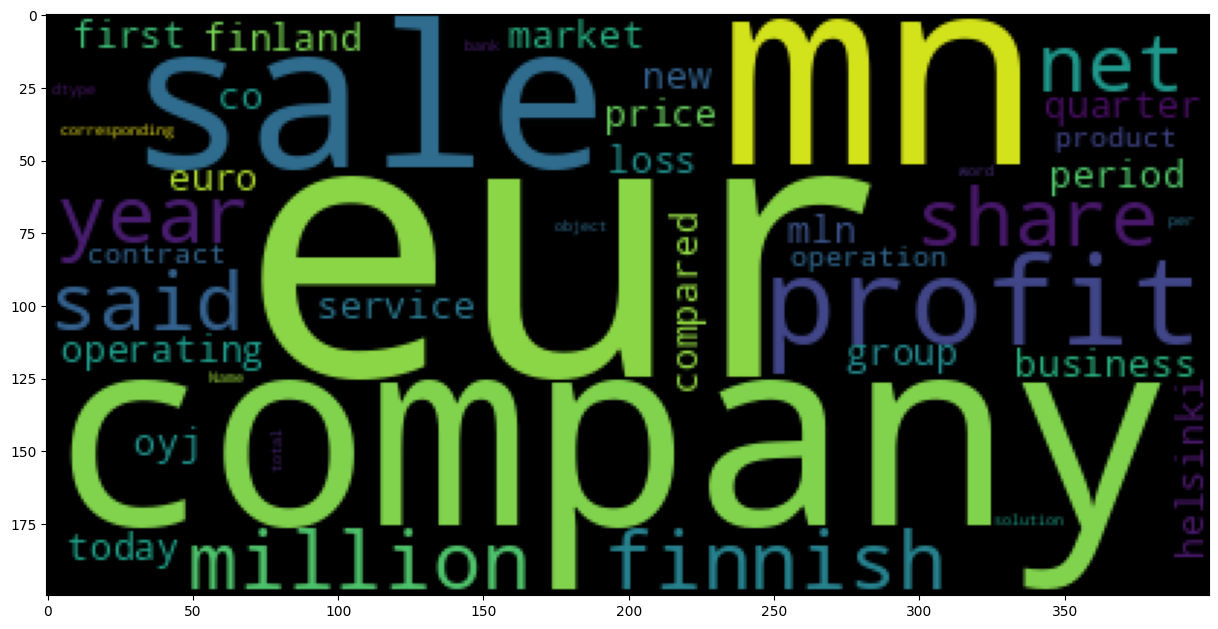

In [54]:
## THE most frequently used psotive words
plt.figure(figsize=(15,8))
wc = WordCloud().generate(str(posotive_count_df['word'].iloc[:40:]))
plt.imshow(wc)
plt.show()

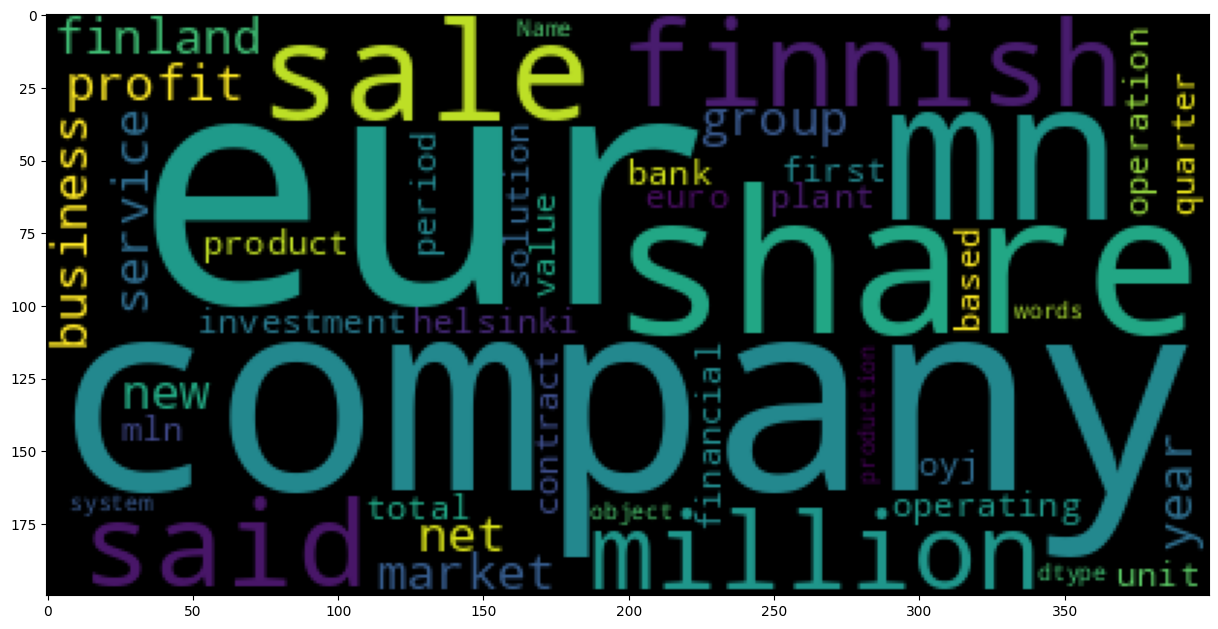

In [55]:
## this word map is for nuetral frequent words

plt.figure(figsize=(15,8))
wc = WordCloud().generate(str(nuteral_words_Df['words'].iloc[:40:]))
plt.imshow(wc)
plt.show()

In [58]:
##pltiing the data into independent and dependent variables
x = data['lemmatize_sentence']
y= data['Sentiment']

In [59]:
### CONVERTING THE TEXTS INTO NUMERICAL VECTORs
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [63]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(1169,)

In [73]:
tfidf = TfidfVectorizer()
x_train_vect = tfidf.fit_transform(x_train)
x_train_vect.toarray()
x_test_vect = tfidf.transform(x_test).toarray()
x_test_vect

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
# Building the MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [71]:
logit_model = LogisticRegression()
logit_model.fit(x_train_vect, y_train)
logit_model

LogisticRegression()

In [74]:
##PREDICT
y_test_predict = logit_model.predict(x_test_vect)
y_test_predict

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

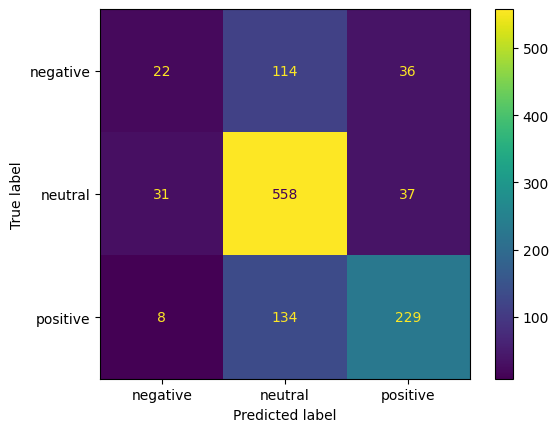

In [75]:
cmd_logit = ConfusionMatrixDisplay.from_predictions(y_test , y_test_predict)
cmd_logit

In [77]:
classification_report_logist = classification_report(y_test,y_test_predict)
print(classification_report_logist)

              precision    recall  f1-score   support

    negative       0.36      0.13      0.19       172
     neutral       0.69      0.89      0.78       626
    positive       0.76      0.62      0.68       371

    accuracy                           0.69      1169
   macro avg       0.60      0.55      0.55      1169
weighted avg       0.66      0.69      0.66      1169



In [78]:
## MULTINOMIAL NB
naive_model  = MultinomialNB()
naive_model.fit(x_train_vect,y_train)
naive_model

MultinomialNB()

In [79]:
##PREDICT
y_test_predict = naive_model.predict(x_test_vect)
y_test_predict

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U8')

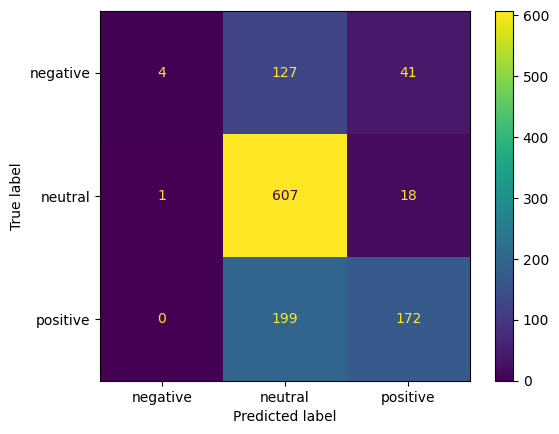

In [80]:
cmd_naives = ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict )
cmd_naives

In [81]:
cr_naives = classification_report(y_test,y_test_predict)
print(cr_naives)

              precision    recall  f1-score   support

    negative       0.80      0.02      0.05       172
     neutral       0.65      0.97      0.78       626
    positive       0.74      0.46      0.57       371

    accuracy                           0.67      1169
   macro avg       0.73      0.49      0.47      1169
weighted avg       0.70      0.67      0.60      1169

